In [30]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
# from pythonds.basic.stack import Stack
from math import *
import random
from sklearn.neighbors import KDTree
import random

In [50]:
# Define coordinates for fake survey sources, fake survey sources, projected distance array, gmag values for LRG
# and survey sources, rmage values for LRG and fake survey sources

# Number of LRG sources
lrg = 20

# Number of survey (non-LRG) sources
survey = 200

# Fake coordinates for LRG sources
for i in range(10):
    random.seed(10)
    x0 = [random.uniform(1,2) for j in range(lrg)]

for i in range(10):
    random.seed(10)
    y0 = [random.uniform(1,2) for j in range(lrg)]

y0 = random.sample(y0, len(y0))
print("length of fake LRG sources (ra) = ", len(x0))
print("length of fake LRG sources (dec) = ", len(y0))
print("x0 = ", x0)
print("y0 = ", y0)
# print(type(y0))

# Fake coordinates for survey sources
for i in range(1000):
    x1 = [random.uniform(1,2) for j in range(survey)]

for i in range(1000):
    y1 = [random.uniform(1,2) for j in range(survey)]
    
print("length of fake survey sources (ra) = ", len(x1))
print("length of fake survey sources (dec) = ", len(y1))
x1[0] = 1.5714025946899135
y1[0] = 1.327772811622093

x1[1] = 1.4288890546751145
y1[1] = 1.9528169091459118

x1[2] = 1.5780913011344704
y1[2] = 1.81332125135732

x1[3] = 1.2060982321395017
y1[3] = 1.8601610372862911

x1[4] = 1.81332125135732
y1[4] = 1.1602295565188196

x1[5] = 1.8235888725334455
y1[5] = 1.603190610968185

x1[6] = 1.6534725339011758
y1[6] = 1.4568311510583056

x1[7] = 1.1602295565188196
y1[7] = 1.6534725339011758

x1[8] = 1.5206693596399246
y1[8] = 1.5714025946899135

x1[9] = 1.327772811622093
y1[9] = 1.0445563824504331

x1[10] = 1.2499966766864004
y1[10] = 1.674964847134956

x1[11] = 1.9528169091459118
y1[11] = 1.2060982321395017

x1[12] = 1.996556992539455
y1[12] = 1.5780913011344704

x1[13] = 1.0445563824504331
y1[13] = 1.4288890546751145

x1[14] = 1.8601610372862911
y1[14] = 1.3816059859191179

x1[15] = 1.603190610968185
y1[15] = 1.283618217906715

x1[16] = 1.3816059859191179
y1[16] = 1.8235888725334455

x1[17] = 1.283618217906715
y1[17] = 1.2499966766864004

x1[18] = 1.674964847134956
y1[18] = 1.996556992539455

x1[19] = 1.4568311510583056
y1[19] = 1.5206693596399246
# print("x1 = ", x1[0])
# print("y1 = ", y1[0])

# Make an array of the RA/Dec of LRGs and survey sources; LRGs are first.
x = np.concatenate([x0, x1])
y = np.concatenate([y0, y1])

print("length of x (ra) =", len(x))
print("length of y (dec) =", len(y))

# Projected radius from LRG (in real code calculated using cosmocalc)
for i in range(10):
    random.seed(10)
    r = [random.uniform(0.002, 0.006) for j in range(lrg)]

print("length of array of projected distances from fake LRGs =", len(r))
print("max r = ", np.amax(r))
print("min r = ", np.amin(r))

# Redshift for LRG 
for i in range(10):
    random.seed(10)
    z = [random.uniform(0.1,0.5) for j in range(lrg)]
    
print("length of array of redshifts for fake LRGs =", len(z))
print("max z = ", np.amax(z))
print("min z = ", np.amin(z))

# Magnitudes for survey sources
for i in range(1000):
    gmag_survey = [random.uniform(14,29) for j in range(survey)]
    rmag_survey = [random.uniform(13,24) for j in range(survey)]
    
print("length of gmag for survey soruces =", len(gmag_survey))
print("length of rmag for survey soruces =", len(rmag_survey))
print("max gmag_survey = ", np.amax(gmag_survey))
print("min gmag_survey = ", np.amin(gmag_survey))
print("max rmag_survey = ", np.amax(rmag_survey))
print("min rmag_survey = ", np.amin(rmag_survey))

# Magnitudes for LRG sources
for i in range(1000):
    gmag_lrg = [random.uniform(17,23) for j in range(lrg)]
    rmag_lrg = [random.uniform(16,21) for j in range(lrg)]
    
print("length of gmag for survey soruces =", len(gmag_lrg))
print("length of rmag for survey soruces =", len(rmag_lrg))
print("max gmag_lrg = ", np.amax(gmag_lrg))
print("min gmag_lrg = ", np.amin(gmag_lrg))
print("max rmag_lrg = ", np.amax(rmag_lrg))
print("min rmag_lrg = ", np.amin(rmag_lrg))

# Make an array of the magnitudes of LRGs and survey sources; LRGs are first.
gmag_all = np.concatenate([gmag_lrg, gmag_survey])
rmag_all = np.concatenate([rmag_lrg, rmag_survey])

print("length of gmag_all =", len(gmag_all))
print("length of rmag_all =", len(rmag_all))

color_all = gmag_all - rmag_all

print("length of color_all = ", len(color_all))

gmag_survey = np.array(gmag_survey)
rmag_survey = np.array(rmag_survey)
color_survey = gmag_survey - rmag_survey

print("length of color_survey = ", len(color_survey))

gmag_lrg = np.array(gmag_lrg)
rmag_lrg = np.array(rmag_lrg)
color_lrg = gmag_lrg - rmag_lrg

print("length of color_lrg = ", len(color_lrg))

length of fake LRG sources (ra) =  20
length of fake LRG sources (dec) =  20
x0 =  [1.5714025946899135, 1.4288890546751145, 1.5780913011344704, 1.2060982321395017, 1.81332125135732, 1.8235888725334455, 1.6534725339011758, 1.1602295565188196, 1.5206693596399246, 1.327772811622093, 1.2499966766864004, 1.9528169091459118, 1.996556992539455, 1.0445563824504331, 1.8601610372862911, 1.603190610968185, 1.3816059859191179, 1.283618217906715, 1.674964847134956, 1.4568311510583056]
y0 =  [1.327772811622093, 1.9528169091459118, 1.81332125135732, 1.8601610372862911, 1.1602295565188196, 1.603190610968185, 1.4568311510583056, 1.6534725339011758, 1.5714025946899135, 1.0445563824504331, 1.674964847134956, 1.2060982321395017, 1.5780913011344704, 1.4288890546751145, 1.3816059859191179, 1.283618217906715, 1.8235888725334455, 1.2499966766864004, 1.996556992539455, 1.5206693596399246]
length of fake survey sources (ra) =  200
length of fake survey sources (dec) =  200
length of x (ra) = 220
length of y (de

H:
[[  0.   4.  15.  13.  13.]
 [  0.  13.  10.  14.   4.]
 [  3.  19.  21.   9.   3.]
 [ 11.  14.  13.  10.   0.]
 [  8.  17.   6.   0.   0.]]
-------
sd:
[[  0.    2.    7.5   6.5   6.5]
 [  0.    6.5   5.    7.    2. ]
 [  1.5   9.5  10.5   4.5   1.5]
 [  5.5   7.    6.5   5.    0. ]
 [  4.    8.5   3.    0.    0. ]]
-------


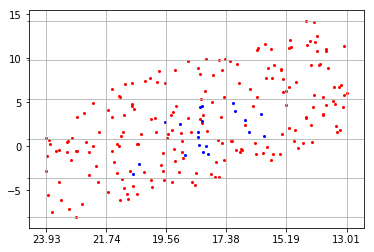

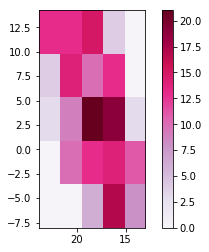

In [51]:
# Test to calculate surface density

# Create a 2D histogram that creates evenly-spaced bins and counts the points in each bin
# H is the matrix with the number of points per bin
# xedges, yedges are the bounds of the bins
# H, xedges, yedges = np.histogram2d(x0, y0, bins=[5,5], normed=False)
row = 5
column = 5
H, xedges, yedges = np.histogram2d(rmag_all, color_all, bins=[row,column], normed=False)
print("H:")
print(H)
print('-------')

# Uses the numbers counted in the histogram to calculate a surface density: For each cell, the number of sources
# divided by the area 
sd = H/2.
print("sd:")
print(sd)
print('-------')

# Scatter plot of points with bin lines drawn
fig, ax = plt.subplots()
ax.set_xticks(xedges, minor=False)
ax.set_yticks(yedges, minor=True)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='minor')

plt.scatter(rmag_survey, color_survey, s = 4, color='red')
plt.scatter(rmag_lrg, color_lrg, s = 4, color='blue')
plt.gca().invert_xaxis()
plt.show()

# color codes bins by surface density with color bar; should make sense when compared to scatter plot
plt.imshow(H, cmap=plt.cm.PuRd, extent=(xedges[0], xedges[5], yedges[0], yedges[5]))
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
plt.show()

# Playing with only plotting one bin at a time. Not useful now but I don't want to forget it.
# dx = x[np.where((x>=xedges[1]) & (x<=xedges[2]) & (y>=yedges[1]) & (y<=yedges[2]))]
# dy = y[np.where((x>=xedges[1]) & (x<=xedges[2]) & (y>=yedges[1]) & (y<=yedges[2]))]

# plt.scatter(dx,dy)
# plt.show()

# print(H.shape)

# print(sd[0,0])
# print(sd[0,1])
# print(sd[1,0])
# print(sd[1,1])

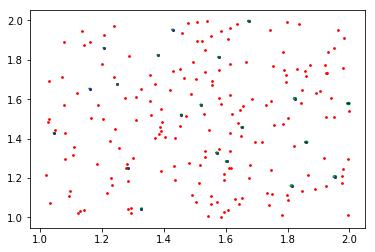

nn = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
nn index =  [array([0]) array([1]) array([2]) array([3]) array([4]) array([5])
 array([6]) array([7]) array([8]) array([9]) array([10]) array([11])
 array([12]) array([13]) array([14]) array([15]) array([16]) array([17])
 array([18]) array([19])]
total index array:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
20
num is [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
length of num is 20


In [52]:
# Test for counting near neighbors

# Plots LRG sources and EDR sources
plt.scatter(x1, y1, s = 3, color='red')
plt.scatter(x0, y0, s = 3, color='blue')

# Draws circle of some radius around the LRG sources
circle = []
for i in range(len(x0)):
    circle = plt.Circle((x0[i],y0[i]), r[i], color='green', fill=False)
    plt.gcf().gca().add_artist(circle)

plt.show()

# Creates a list of ordered pairs; zips ra and dec together so they can be fed into KDTree
# zip_list0 = list(zip(x0, y0))
zip_list0 = list(zip(x0, y0)) # Fake LRG sources
zip_list1 = list(zip(x1, y1)) # Fake EDR sources
# print(type(zip_list))
# print(zip_list)
# print(zip_list0[0])

# Creates a tree of EDR sources
gal_tree = KDTree(zip_list1)

# returns a list of EDR sources that are within some radius of an LRG
nn = gal_tree.query_radius(zip_list0,r=r,count_only=True)
print("nn =", nn)
# print("length of nn = ", len(nn))

# find indices of near neighbors
ind = gal_tree.query_radius(zip_list0,r=r)
# print("length of nn index = ", len(ind))
print("nn index = ", ind)
# print("index 0 =", ind[0])
# print("index 1 =", ind[1])
# print("index 2 =", ind[2])
# print("index 3 =", ind[3])
# print("index 4 =", ind[4])
# print("index 5 =", ind[5])
# print("index 6 =", ind[6])
# print("index 7 =", ind[7])
# print("index 8 =", ind[8])
# print("index 9 =", ind[9])

# print(type(ind[0]))
# print(type(ind))

total_ind = np.concatenate(ind)
print("total index array: ", total_ind)
print(len(total_ind))

# Array that gives actual number of near neighbors for every LRG
num = []

for i in range(len(ind)):
    num.append(len(ind[i]))

print("num is", num)
print("length of num is", len(num))

# print(type(ind))
# print(type(ind[0]))

In [53]:
# Create 2D histograms in bins of color and magnitude for near neighbors found above

Nn = [[[] for x in range(row)] for y in range(column)] 
print("Nn = ", Nn)

for i in range(len(ind)):
    if len(ind[i]) == 0:
        hist2d = np.zeros((row,column))
        Nn = np.append(Nn, hist2d)
        print("list is empty")
#         print(hist2d)
    else:
        print(ind[i])
        hist2d, x_notuse, y_notuse = np.histogram2d(rmag_survey[ind[i]], color_survey[ind[i]], bins=[xedges, yedges], normed=False)
        Nn = np.append(Nn, hist2d)
        print(hist2d)
#     np.append(Nn, hist2d)
# np.append(Nn, hist2d)

# print("Nn = ", Nn)
Nn = [Nn[i:i+(row*column)] for i in range(0, len(Nn), (row*column))]
# print("reshaped Nn = ", Nn)
# print("")
# print("Nn0 is ", Nn[0])
# print("")
# print("Nn1 is ", Nn[1])
# print("")
# print("Nn2 is ", Nn[2])
# print("")
# print("Nn3 is ", Nn[3])
# print("")
# print("Nn4 is ", Nn[4])
# print("")
# print("Nn5 is ", Nn[5])
# print("")
# print("Nn6 is ", Nn[6])
# print("")
# print("Nn7 is ", Nn[7])
# print("")
# print("Nn8 is ", Nn[8])
# print("")
# print("Nn9 is ", Nn[9])
# print("")

near = []
# near=np.reshape(near, (2,2))
# print(near)
for i in range(len(Nn)):
    near.append(np.reshape(Nn[i], (row,column)))
    
print("near = ", near)

# print("-------------")
# print(near[0])
# print("")
# print(near[1])
# print("")
# print(near[2])
# print("")
# print(near[3])
# print("")
# print(near[4])
# print("")
# print(near[5])
# print("")
# print(near[6])
# print("")
# print(near[7])
# print("")
# print(near[8])
# print("")
# print(near[9])
# print("")

Nn =  [[[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []]]
[0]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[1]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]]
[2]
[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[3]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]]
[4]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]]
[5]
[[ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[6]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[7]
[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0

In [54]:
# Make CMDs for LRG near neighbors

# First, make one CMD for one set of near neighbors 

# Magnitudes for survey sources
# for i in range(1000):
#     gmag_survey = [random.uniform(1,100) for j in range(100)]
#     rmag_survey = [random.uniform(1,100) for j in range(100)]
    
# print("length gmag_survey = ", len(gmag_survey))
# print("length rmag_survey = ", len(rmag_survey))
# print("gmag_survey = ", gmag_survey[0])
# print("rmag_survey = ", rmag_survey[0])

# ra = x1
# dec = y1
# index = []
# print("length ind = ", len(ind))

# for i in range(len(ind)):
#     index = ind[i]
#     index_full = []
# #     print("index = ", index)
# #     print(type(index))
#     for j in range(len(index)):
#         index_full.append(index[j])
#     print("index_full = ", index_full)
#     print("first index = ", index_full[0])
#     gmag_near = []
#     rmag_near = []
#     color = []
#     for k in range(len(index_full)):
#         gmag_near.append(gmag_survey[index_full[k]])
#         rmag_near.append(rmag_survey[index_full[k]])
#     print("length gmag = ", len(gmag_near))
#     print("length rmag = " , len(rmag_near))
#     color.append(np.array(gmag_near) - np.array(rmag_near))
#     plt.scatter(rmag_near, color, color = "teal")
#     plt.show()
    

# gmag_near0 = []
# rmag_near0 = []

# for i in range(len(ind0)):
#     gmag_near0.append(gmag_survey[ind0[i]])
#     rmag_near0.append(rmag_survey[ind0[i]])

# # print(gmag_near0)
# # print(rmag_near0)
# print(len(ind0))
# print(len(gmag_near0))
# print(len(rmag_near0))
# print(type(rmag_near0))

# gmag_near0 = np.array(gmag_near0)
# rmag_near0 = np.array(rmag_near0)

# color = gmag_near0 - rmag_near0

# plt.scatter(rmag_near0, color, color="teal")
# plt.show()

In [55]:
# calculates solid angle (in radians) subtending projected radius r

omega = []

# omega = np.pi * (r[1]/2.)**2.


for i in range(len(r)):
    ang = np.pi * (r[i]/2.)**2.
    omega.append(ang)

print("omega is", omega)
# print(type(omega))
# print(r[1]) 

Nbkg = []
# sd = 0.5

for i in range(len(omega)):
    for j in range(row):
        for k in range(column):
            Nbkg.append(sd[j][k] * omega[i])
#     Nbkg.append(interlop)

print("sd is", sd)
# print("sd cell (0,0) is", sd[0][0])
# print("omega0 is", omega[0])

# print("sd(0,0)*omega0 is", sd[0][0]*omega[0])
# print("sd(0,1)*omega0 is", sd[0][1]*omega[0])
# print("sd(1,0)*omega0 is", sd[1][0]*omega[0])
# print("sd(1,1)*omega0 is", sd[1][1]*omega[0])
# print("")
# print("sd(0,0)*omega1 is", sd[0][0]*omega[1])
# print("sd(0,1)*omega1 is", sd[0][1]*omega[1])
# print("sd(1,0)*omega1 is", sd[1][0]*omega[1])
# print("sd(1,1)*omega1 is", sd[1][1]*omega[1])
# print("")
# print("The length of Nbkg is", len(Nbkg))
# print("Nbkg array", Nbkg)
# print(Nbkg.shape)

Nbkg = [Nbkg[i:i+(row*column)] for i in range(0, len(Nbkg), (row*column))]

# print("The length of Nbkg is", len(Nbkg))
# print("Nbkg array", Nbkg)

# print("Nbkg0 is ", Nbkg[0])
# print("")
# print("Nbkg1 is ", Nbkg[1])
# print("")
# print("Nbkg2 is ", Nbkg[2])
# print("")
# print("Nbkg3 is ", Nbkg[3])
# print("")
# print("Nbkg4 is ", Nbkg[4])
# print("")
# print("Nbkg5 is ", Nbkg[5])
# print("")
# print("Nbkg6 is ", Nbkg[6])
# print("")
# print("Nbkg7 is ", Nbkg[7])
# print("")
# print("Nbkg8 is ", Nbkg[8])
# print("")
# print("Nbkg9 is ", Nbkg[9])

interlop = []
for i in range(len(Nbkg)):
    interlop.append(np.reshape(Nbkg[i], (row,column)))
    
print("interlopers")
print(interlop)
    
# print("-------------")
# print(interlop[0])
# print("")
# print(interlop[1])
# print("")
# print(interlop[2])
# print("")
# print(interlop[3])
# print("")
# print(interlop[4])
# print("")
# print(interlop[5])
# print("")
# print(interlop[6])
# print("")
# print(interlop[7])
# print("")
# print(interlop[8])
# print("")
# print(interlop[9])
# print("")

omega is [1.4424981060694859e-05, 1.084270282949404e-05, 1.4605651964082822e-05, 6.265274627915953e-06, 2.1674635745003004e-05, 2.2014867643574547e-05, 1.6719542109303828e-05, 5.477719495640784e-06, 1.309121691691678e-05, 8.610575510244875e-06, 7.0685208277302834e-06, 2.6523549071065737e-05, 2.8144684524508376e-05, 3.7264523225807756e-06, 2.324826375368707e-05, 1.529364404881412e-05, 9.76694910392637e-06, 7.716474267227027e-06, 1.7348407346741994e-05, 1.1504837158679283e-05]
sd is [[  0.    2.    7.5   6.5   6.5]
 [  0.    6.5   5.    7.    2. ]
 [  1.5   9.5  10.5   4.5   1.5]
 [  5.5   7.    6.5   5.    0. ]
 [  4.    8.5   3.    0.    0. ]]
interlopers
[array([[  0.00000000e+00,   2.88499621e-05,   1.08187358e-04,
          9.37623769e-05,   9.37623769e-05],
       [  0.00000000e+00,   9.37623769e-05,   7.21249053e-05,
          1.00974867e-04,   2.88499621e-05],
       [  2.16374716e-05,   1.37037320e-04,   1.51462301e-04,
          6.49124148e-05,   2.16374716e-05],
       [  7.93

In [56]:
# Calculate number of satellite galaxies

sat = []
# a = []

# a = np.array(num[0]) - np.array(Nbkg[0])
# print(a)

for i in range(len(near)):
    sat = np.append(sat, [np.array(near[i]) - np.array(interlop[i])])

sat = [sat[i:i+(row*column)] for i in range(0, len(sat), (row*column))]

Nsat = []
for i in range(len(sat)):
    Nsat.append(np.reshape(sat[i], (row,column)))

# print("numsats0 is ", numsats[0])
# print("")
# print("numsats1 is ", numsats[1])
# print("")
# print("numsats2 is ", numsats[2])
# print("")
# print("numsats3 is ", numsats[3])
# print("")
# print("numsats4 is ", numsats[4])
# print("")
# print("numsats5 is ", numsats[5])
# print("")
# print("numsats6 is ", numsats[6])
# print("")
# print("numsats7 is ", numsats[7])
# print("")
# print("numsats8 is ", numsats[8])
# print("")
# print("numsats9 is ", numsats[9])

print(len(Nsat))
print(Nsat)
print(type(Nsat))
Nsat = np.array(Nsat)
print(type(Nsat))

20
[array([[  0.00000000e+00,  -2.88499621e-05,  -1.08187358e-04,
         -9.37623769e-05,  -9.37623769e-05],
       [  0.00000000e+00,  -9.37623769e-05,  -7.21249053e-05,
         -1.00974867e-04,  -2.88499621e-05],
       [ -2.16374716e-05,  -1.37037320e-04,  -1.51462301e-04,
         -6.49124148e-05,  -2.16374716e-05],
       [ -7.93373958e-05,  -1.00974867e-04,   9.99906238e-01,
         -7.21249053e-05,   0.00000000e+00],
       [ -5.76999242e-05,  -1.22612339e-04,  -4.32749432e-05,
          0.00000000e+00,   0.00000000e+00]]), array([[  0.00000000e+00,  -2.16854057e-05,  -8.13202712e-05,
         -7.04775684e-05,  -7.04775684e-05],
       [  0.00000000e+00,  -7.04775684e-05,  -5.42135141e-05,
         -7.58989198e-05,  -2.16854057e-05],
       [ -1.62640542e-05,  -1.03005677e-04,  -1.13848380e-04,
         -4.87921627e-05,  -1.62640542e-05],
       [ -5.96348656e-05,  -7.58989198e-05,  -7.04775684e-05,
         -5.42135141e-05,   0.00000000e+00],
       [ -4.33708113e-05,   9.9

In [57]:
# Here I want to calculate a mean Nsat in bins of projected radius

r = np.array(r)
print("r = ", r)
# print(type(r))

# Use 0 <= r <= 2, 2 < r <= 4, r > 4

# 0 <= r <= 2
Nsat_low_r = Nsat[np.where((r >= 0.002) & (0.0035 >= r))]

# 2 < r <= 4
Nsat_med_r = Nsat[np.where((r > 0.0035) & (0.005 >= r))]

# r > 4
Nsat_high_r = Nsat[np.where((r > 0.005) & (0.006 >= r))]

# Calculate averages for three radius bins
s_low = 0.
for i in range(len(Nsat_low_r)):
    s_low += Nsat_low_r[i]
    
r_avg_low = s_low / len(Nsat_low_r)
print("Average for 0 <= r <= 2")
print(r_avg_low)

print("---------")

s_med = 0.
for i in range(len(Nsat_med_r)):
    s_med += Nsat_med_r[i]
    
r_avg_med = s_med / len(Nsat_med_r)
print("Average for 2 < r <= 4")
print(r_avg_med)

print("---------")

s_high = 0.
for i in range(len(Nsat_high_r)):
    s_high += Nsat_high_r[i]
    
r_avg_high = s_high / len(Nsat_high_r)
print("Average for r > 4")
print(r_avg_high)

r =  [ 0.00428561  0.00371556  0.00431237  0.00282439  0.00525329  0.00529436
  0.00461389  0.00264092  0.00408268  0.00331109  0.00299999  0.00581127
  0.00598623  0.00217823  0.00544064  0.00441276  0.00352642  0.00313447
  0.00469986  0.00382732]
Average for 0 <= r <= 2
[[  0.00000000e+00  -1.29550057e-05   1.66618085e-01  -4.21037685e-05
    1.66624563e-01]
 [  0.00000000e+00  -4.21037685e-05  -3.23875142e-05  -4.53425199e-05
   -1.29550057e-05]
 [ -9.71625426e-06  -6.15362770e-05   1.66598653e-01  -2.91487628e-05
   -9.71625426e-06]
 [ -3.56262656e-05   1.66621324e-01  -4.21037685e-05  -3.23875142e-05
    0.00000000e+00]
 [ -2.59100114e-05   1.66611608e-01   1.66647234e-01   0.00000000e+00
    0.00000000e+00]]
---------
Average for 2 < r <= 4
[[  0.00000000e+00  -2.74662072e-05  -1.02998277e-04  -8.92651735e-05
   -8.92651735e-05]
 [  0.00000000e+00   2.22132957e-01  -6.86655181e-05   2.22126090e-01
   -2.74662072e-05]
 [ -2.05996554e-05  -1.30464484e-04   1.10966914e-01  -6.17989

In [58]:
z = np.array(z)
print("z = ", z)
# print(type(z))

# Use 0 < z <= 0.5, 0.5 < z <= 1

# 0 <= r <= 0.5
Nsat_low_z = Nsat[np.where((z >= 0.1) & (0.25 >= z))]

# 0.5 < r <= 1.
Nsat_high_z = Nsat[np.where((z > 0.25) & (0.5 >= z))]


# Calculate averages for three radius bins
s_low = 0.
for i in range(len(Nsat_low_z)):
    s_low += Nsat_low_z[i]
    
z_avg_low = s_low / len(Nsat_low_z)
print("Average for 0 <= z <= 0.5")
print(z_avg_low)

print("---------")

s_high = 0.
for i in range(len(Nsat_high_z)):
    s_high += Nsat_high_z[i]
    
z_avg_high = s_high / len(Nsat_high_z)
print("Average for 0.5 < z < 1")
print(z_avg_high)

z =  [ 0.32856104  0.27155562  0.33123652  0.18243929  0.4253285   0.42943555
  0.36138901  0.16409182  0.30826774  0.23110912  0.19999867  0.48112676
  0.4986228   0.11782255  0.44406441  0.34127624  0.25264239  0.21344729
  0.36998594  0.28273246]
Average for 0 <= z <= 0.5
[[  0.00000000e+00  -1.29550057e-05   1.66618085e-01  -4.21037685e-05
    1.66624563e-01]
 [  0.00000000e+00  -4.21037685e-05  -3.23875142e-05  -4.53425199e-05
   -1.29550057e-05]
 [ -9.71625426e-06  -6.15362770e-05   1.66598653e-01  -2.91487628e-05
   -9.71625426e-06]
 [ -3.56262656e-05   1.66621324e-01  -4.21037685e-05  -3.23875142e-05
    0.00000000e+00]
 [ -2.59100114e-05   1.66611608e-01   1.66647234e-01   0.00000000e+00
    0.00000000e+00]]
---------
Average for 0.5 < z < 1
[[  0.00000000e+00  -3.50291333e-05   7.12972122e-02  -1.13844683e-04
    1.42743298e-01]
 [  0.00000000e+00   1.42743298e-01  -8.75728333e-05   1.42734541e-01
   -3.50291333e-05]
 [ -2.62718500e-05   7.12621830e-02   7.12446685e-02  -7.88

In [59]:
# Add up all the satellites in each projected radius bin and plot the distribution

Nsat_tot_low_r = np.sum(Nsat_low_r)
Nsat_tot_med_r = np.sum(Nsat_med_r)
Nsat_tot_high_r = np.sum(Nsat_high_r)

# totals = np.array([Nsat_tot_low_r, Nsat_tot_med_r, Nsat_tot_high_r])
# totals = np.array([3, 5, 7])

print("Total Nsat (low r)")
print(Nsat_tot_low_r)
print("")
print("Total Nsat (med r)")
print(Nsat_tot_med_r)
print("")
print("Total Nsat (high r)")
print(Nsat_tot_high_r)
print("")
# print("Totals")
# print(totals)

# Use 0 <= r <= 2, 2 < r <= 4, r > 4

# plt.hist(totals, bins=3)
# plt.show()

Total Nsat (low r)
5.99572484812

Total Nsat (med r)
8.98640422742

Total Nsat (high r)
4.98662333992

